My dataset is Graduate Admissions - Predicting admission from important parameters from Kaggle. The dataset can be found here: https://www.kaggle.com/mohansacharya/graduate-admissions

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
#load the datasaet
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [90]:
df.shape

(400, 9)

In [91]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

A description of the dataset columns:

1. Serial No: 
2. GRE score: 0-340
3. TOEFL score: 0-120
4. University Ranking:  
5. SOP: Statement of Purpose, 1-5
6. LOR: Letter of Recommendation, 1-5
7. CGPA: College GPA, 0-9.92
8. Research: either 0 or 1
9. Chance of Admission: 1-5

In [101]:
#First rename one of the columns
df = df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [102]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [62]:
#Check if there is any null value
df.isnull().values.any()

False

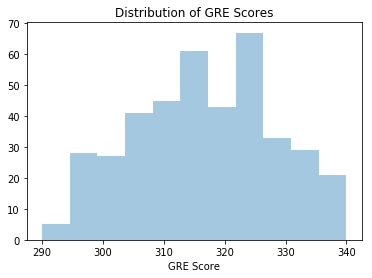

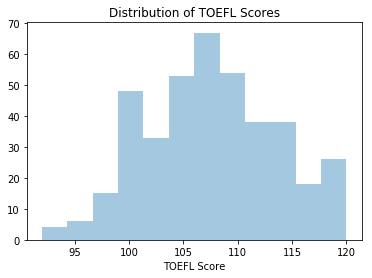

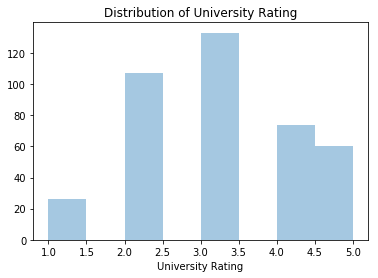

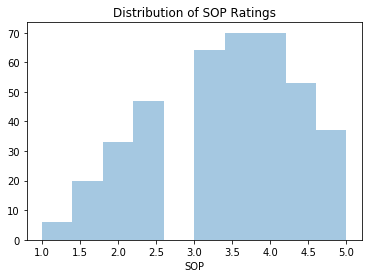

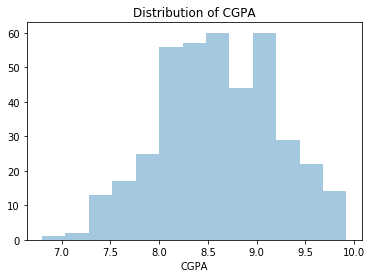

In [114]:
#Use histogram to see the distributions
fig = sns.distplot(df['GRE Score'], kde = False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde = False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde = False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde = False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde = False)
plt.title("Distribution of CGPA")
plt.show()

None of the graph is normally dostributed.

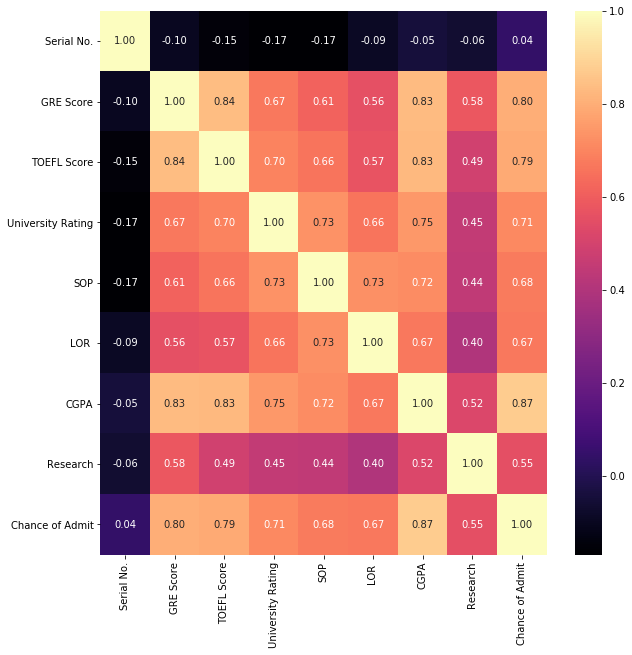

In [111]:
#import seaborn and make a heatmap to find the correlation between the variables
import seaborn as sns
import sys
fig = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = "magma")
plt.show()

From the heatmap we can see that the least important features for graduate admission are research, LOR, and SOP. the most important features are CGPA, GRE SCORE, and TOEFL SCORE. 

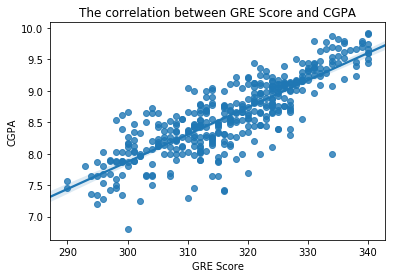

In [99]:
#Plot a regplot for the correlation between GRE Score and CGPA
fig = sns.regplot(x ="GRE Score", y = "CGPA", data = df)
plt.title("The correlation between GRE Score and CGPA")
plt.show()

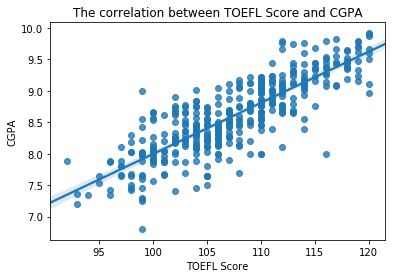

In [103]:
#Plot a regplot for the correlation between Toefl Score and CGPA
fig = sns.regplot(x ="TOEFL Score", y = "CGPA", data = df)
plt.title("The correlation between TOEFL Score and CGPA")
plt.show()

We can see that there is a positive correlation between Toefl Score and CGPA, and between GRE Score and CGPA.

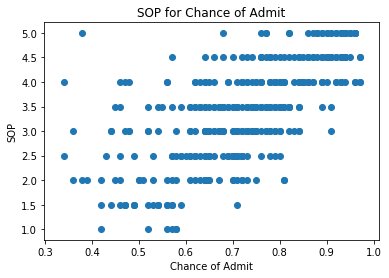

In [106]:
plt.scatter(df["Chance of Admit"],df.SOP)
plt.xlabel("Chance of Admit")
plt.ylabel("SOP")
plt.title("SOP for Chance of Admit")
plt.show()

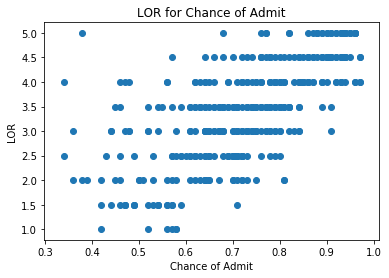

In [119]:
plt.scatter(df["Chance of Admit"],df.SOP)
plt.xlabel("Chance of Admit")
plt.ylabel("LOR")
plt.title("LOR for Chance of Admit")
plt.show()

From the way the dots are distributed, we can tell that people with a higher chance of admission generally received a higher score in letter of recommendation and statement of Purpose.

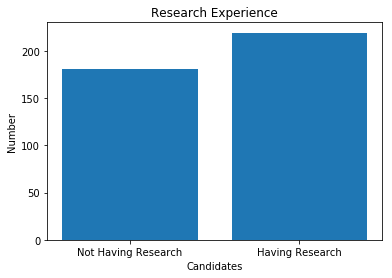

In [105]:
#Use a column chart to find the number of candidates have/not have done research
import numpy as np
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Number")
plt.show()